
## Part I: Sentiment Analysis for Movie Reviews

Sentiment analysis is a hot topic in data science right now due to the immense amount of user-generated text data being created every day online.  Businesses can now look at what is being said about them on review sites to get an idea of how well they are liked, how much they are disliked, and what they can do to improve.  While most of this data is unlabeled, some sites also ask users to provide a numerical or star rating.  This allows us to build a classifier for positive/negative reviews using the star rating as a label, which could then be hypothetically applied to unlabeled text.

IMDB collects information about movies and lets users write their own reviews, as well as provide a 1-10 numerical rating.   The data for this assignment can be found in 'IMDB_TRAIN.csv' and IMDB_TEST.csv', the training and test data respectively. It consists of thousands of positive and negative reviews collected from IMDB.  The ratings have been binarized by labeling anything with score between 7 and 10 as “P” and anything between 1 and 4 with “N” (there are no “neutral” reviews in the data).  You will build and evaluate a system that classifies these movie reviews as positive or negative.

__1. Load the training data and the test data.__

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline

# Remember to change this to the path of your files.
train_path = 'https://raw.githubusercontent.com/bwolfson2/foster_2020/master/Homeworks/data/IMDB_TRAIN.csv'
test_path = 'https://raw.githubusercontent.com/bwolfson2/foster_2020/master/Homeworks/data/IMDB_TEST.csv'

columns = ['text', 'class']
df_imdb_train = pd.read_csv(train_path, names=columns)
df_imdb_test = pd.read_csv(test_path, names=columns)
df_imdb_train.head()

,text,class
0,'If you hit your teens in the 70s as I did you...,N
1,'Excellent endearing film with Peter Falk and ...,P
2,'Oh dear what a horrid movie. The production w...,N
3,'This is a terrible production of Bartleby tho...,N
4,'I actually have a fondness for Christopher Le...,N


__2. Build a Bernoulli Naive Bayes model to classify reviews according to their sentiment using a binary count vectorizer (check out the text mining module in the class notebooks if you do not know what this question is talking about). Test its accuracy on the test data. Is it good compared to just predicting a positive sentiment for all reviews?__

In [ ]:
# Your answer here.
df_imdb_test = df_imdb_test.dropna()
X_train = df_imdb_train['text']
Y_train = df_imdb_train['class']
X_test = df_imdb_test['text']
Y_test = df_imdb_test['class']
le = preprocessing.LabelEncoder()
le.fit(Y_train)
Y_train=le.transform(Y_train)
le.fit(Y_test)
Y_test=le.transform(Y_test)
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(X_train)
X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)
model_nb = BernoulliNB()
model_nb.fit(X_train_binary, Y_train)
probs = model_nb.predict_proba(X_test_binary)[:,1]
pred=model_nb.predict(X_test_binary)
acc=accuracy_score(Y_test, pred)
Y_train_df = pd.DataFrame(data=Y_train)
Y_test_df = pd.DataFrame(data=Y_test)
print('Bernoulli NB accuracy', acc)
print('positive for all', Y_test_df.sum()/Y_test_df.count())

Bernoulli NB accuracy 0.9031650782444993
positive for all 0    0.498882
dtype: float64


**Bernoulli Naive Bayes is better than predicting positive sentiment for all reviews**

__3. Pick a few reviews in the test set that were incorrectly classified and read them through.  Are there any words in these misclassified reviews that may have misled the classifier?  Explain with at least three examples for each type of error (i.e., false positive and false negative).__


In [ ]:
# Your answer here.
pred_df = pd.DataFrame(data=pred,columns=['pred'])
pred_df['act']=Y_test
fp=pred_df.loc[(pred_df['pred']==1)&(pred_df['act']==0)]
fn=pred_df.loc[(pred_df['pred']==0)&(pred_df['act']==1)]
fp_idx=fp.index
fn_idx=fn.index
fp_txt=df_imdb_test.loc[df_imdb_test.index.isin(fp_idx)]
fn_txt=df_imdb_test.loc[df_imdb_test.index.isin(fn_idx)]
print('false positive', fp_txt.head(3).index)
print('false negative', fn_txt.head(3).index)

false positive Int64Index([26, 36, 174], dtype='int64')
false negative Int64Index([24, 27, 49], dtype='int64')


In [ ]:
df_imdb_test['text'][26]

"'Val Kilmer solid performance. Dylan McDermott solid performance. Josh Lucas solid performance. Three very engaging actors giving decent performances. The problem is who cares about the plot? John Holmes. Infamous for his well-endowments a drug addict and a guy who despite contracting AIDS continued to make adult films just does not make an intriguing character. The story surrounds the events leading up to and the aftermath of a vicious mass murder that occurred in the late 80s in Los Angelos to which Holmes was linked arrested and charged with murder and who ultimately was acquitted. Just like in the case of O.J. the guilt factor regardless of the outcome ranged quite high in the He did it zone. There is no one to sympathize with in this film as everyone is a self-serving criminal. There is just nothing remotely interesting here.'"

**Classified positive despite beign actually negative because of repeating "solid" and "decent"**

In [ ]:
df_imdb_test['text'][36]

"'John Wayne & Albert Dekker compete for oil rights on Indian territory and for the attention of Martha Scott in this Republic Pictures film shot out of Utah USA. An interesting Western of sorts due to its characters and its more modern setting with Wayne & Dekker playing the old and new factions of the West. Its based on a story by Thomson Burtis who co-writes the script along with Eleanore Griffin and Ethel Hill. Albert Rogell directs in the workmanlike way that befits his career. A pretty mundane story is in truth saved by its final third where thankfully the action picks up and we are treated to something resembling a pulse. The light hearted approach to the romantic strand doesnt sit quite right and a glorious fist fight between the two protagonists is ruined by Rogell being unable to disguise the stunt men doing the work. But hey stunt men deserve their moment of glory always. Solid support comes from George Gabby Hayes and Wayne as usual has much screen charisma particularly whe

**Classified positive despite actually beign negative because of "interesting", "saved", "thankfully", "glorious", "glory", "solid", "charisma"**

In [ ]:
df_imdb_test['text'][174]

"'On the 26th of September 1983 a short dumpy 60 year old woman stood trial for the attempted murder of Leonie Haddad a lady whose husband had recently died and had agreed to take in a lodger who came via a housing authority for the elderly. Haddad was not made aware that her new lodger had in fact come fresh from The Patton State Mental Hospital where she had been incarcerated for an inexplicable knife attack on a married couple three years previously. Haddad soon realised that something was rotten in Denmark when the woman began to lock herself in the bathroom with a tape recorder reciting prophesies about seven Gods. Haddads fears were confirmed one night when she awoke to find her lodger sitting astride her chest holding a bread knife announcing that God has inspired me to kill you. Haddad managed to knock her assailant out with a telephone but not before she had lost a finger and suffered deep lacerations to her face and chest. It was a miracle she survived. The lodger was judged 

**Classified positive despite beign negative because of "agreed", "God", "inspired", "miracle"**

In [ ]:
df_imdb_test['text'][24]

"'CREEP is a straight up serious horror film set in real time that wants nothing more than to just show people get attacked in a empty subway platform by a mutant for 85 minutes. And it does just that. Nothing more nothing less. Director Christopher Smith draws out the drama a far as he plausibly can by introducing a series of characters that would actually have a reason to be in the subway after it is locked. He also leaves the origins of the titular Creep deliberately vague (unlawful experiments happening in the 60s underground are hinted at) and that little bit of mystery works for the most part. Sadly he undermines himself toward the end by actually holding back from a twist ending where more genetic malformations would appear (they are hinted at as well). Yes you heard me right - I wanted a clichéd twist ending! Franka (RUN LOLA RUN) Potente is good as the terrorized female lead and the rest of the cast is fine.'"

**Classified negative despite actually beign positive because of "CREEP", "Creep", "horror", "sadly", "malformation", "terrorized"**

In [ ]:
df_imdb_test['text'][27]

"'A surprisingly good movie! It has quite a few good jokes thru out the whole movie. The only negative thing is that some scenes go to the extremes to show just how stupid the two main characters are. We get it stupid blondes get on with it!  The plot just barely dodges being called corny. And boobies are always a plus altho the movie for some strange reason doesnt play with that card very much even tho the plot line introduces two black haired women who act as the evil counter part of our two blondes. So all in all a good movie to watch. I almost gave it an 8/10 but lets not get crazy.'"

**Classified negative despite actually beign positive because of "negative", repeating "stupid", "evil".**

In [ ]:
df_imdb_test['text'][49]

"'This movie has recieved horrible ratings from just about everyone who has voted here but i am here to say if you like movies like Dude Wheres my Car and Dumb and Dumber this movie is for you. If your into movies like Citizen Kane and Casablanca id have to sugest you in a different angle. Yet i still love this movie and everything about it even if it is kind of kiddy this is one of the few movies me and my freinds have been able to keep watching over the years and quote whenever possible. GREAT MOVIE. This movie should the AFIs number 1 because its so friggin high class. The only problem with this movie is you may have trouble seeing it because it was a made for tv movie on a channel that no longer exists. So i dont know how to get this movie id like to buy it for dvd but i cant find it anywhere. I still have it taped from when it was first on you can come over if you want and watch it bute i might be sleeping. this movie rocks and thats basicly all you need to know.'"

**Classified negative despite actually beign positive because of "horrible", "friggin", "no", "don't", "can't"**

__4. Improve the accuracy of your model on the test data. Try at least two of the following to do this:__
* __Use a non-binary count vectorizer or a tf-idf count vectorizer.__
* __Use n-grams.__
* __Remove stopwords.__


In [ ]:
# Your answer here.
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)
X_train_counts = count_vectorizer.transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
model_nb_counts = BernoulliNB()
model_nb_counts.fit(X_train_counts, Y_train)
probs_counts = model_nb_counts.predict_proba(X_test_counts)[:,1]
pred_counts = model_nb_counts.predict(X_test_counts)
acc_counts = accuracy_score(Y_test, pred_counts)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
model_nb_tfidf = BernoulliNB()
model_nb_tfidf.fit(X_train_tfidf, Y_train)
probs_tfidf = model_nb_tfidf.predict_proba(X_test_tfidf)[:,1]
pred_tfidf = model_nb_tfidf.predict(X_test_tfidf)
acc_tfidf=accuracy_score(Y_test, pred_tfidf)

ngram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
ngram_vectorizer.fit(X_train)
X_train_ngram = ngram_vectorizer.transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)
model_nb_ngram = BernoulliNB()
model_nb_ngram.fit(X_train_ngram, Y_train)
probs_ngram = model_nb_ngram.predict_proba(X_test_ngram)[:,1]
pred_ngram = model_nb_ngram.predict(X_test_ngram)
acc_ngram = accuracy_score(Y_test, pred_ngram)

print('Bernoulli NB binary accuracy', acc)
print('Bernoulli counts accuracy', acc_counts)
print('Bernoulli tf idf accuracy', acc_tfidf)
print('Bernoulli ngrams & stop word accuracy', acc_ngram)
print('positive for all', Y_test_df.sum()/Y_test_df.count())

Bernoulli NB binary accuracy 0.9031650782444993
Bernoulli counts accuracy 0.9031650782444993
Bernoulli tf idf accuracy 0.9031650782444993
Bernoulli ngrams & stop word accuracy 0.9931756677256148
positive for all 0    0.498882
dtype: float64


**n-grams with removing stop words worked best**

## Part II: Multi-Class Text Classification

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. 

Suppose you've been hired by a finance institution that wants to classify incoming consumer complaints in product categories in order to forward them to the most appropriate customer support agents. You have a sample of the complaints that have been addressed in the past, each of them labeled as one category by the agent that addressed the complaint. Each complaint is assigned to one and only one category. 

Let's take a look at the data.

__1. Load the data.__

In [ ]:
# Remember to change this to the path of your file.
complaints_path = 'https://raw.githubusercontent.com/bwolfson2/foster_2020/master/Homeworks/data/complaints_sample.csv'

data = pd.read_csv(complaints_path)
data.head()

,Consumer complaint narrative,Product
0,This is not a duplicate case. Please escalate ...,Credit card or prepaid card
1,I reported the problem to Money gram agent. wo...,"Money transfer, virtual currency, or money ser..."
2,"Medical debt is not mine, debt is my sons who ...",Debt collection
3,"Someone called me yesterday morning, XX/XX/201...",Debt collection
4,This is a debt with Conn 's - I am not 30 days...,Debt collection


__2. Print how many complaints there are for each product category.__

In [ ]:
data['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    24401
Debt collection                                                                 17065
Mortgage                                                                        10552
Credit card or prepaid card                                                      8333
Student loan                                                                     4184
Bank account or service                                                          2985
Checking or savings account                                                      2485
Consumer Loan                                                                    1868
Money transfer, virtual currency, or money service                               1345
Payday loan, title loan, or personal loan                                        1223
Vehicle loan or lease                                                            1134
Name: Product, dtype: int64

__3. Split the data into a training and a test set. Build a logistic regression model to classify complaints according to product categories. Report its accuracy when applied to the test set. Why is this number relatively low compared to the binary accuracy in Part I?__

In [ ]:
X = data['Consumer complaint narrative']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=100)
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)
X_train_lr= count_vectorizer.transform(X_train)
X_test_lr = count_vectorizer.transform(X_test)
lr = LogisticRegression(solver='liblinear',max_iter=1000)
lr.fit(X_train_lr, Y_train)
pred_lr = lr.predict(X_test_lr)
acc_lr = accuracy_score(Y_test, pred_lr)
print(acc_lr)

0.7716175984121734


**Binary Vectorizer shows higher occuracy because it works better for discrete probabilistic problems. It achieves it by assigning all non-zeros to 1 unlike integer counts.**

__4. Make a confusion matrix that shows the errors made by your model. Use the test set labels and your predictions for the test set to build the matrix. Plot the confusion matrix using a Seaborn heatmap. What would perfect predictions look like? Give an example of one systematic type of error that you see. How can you tell that this is a systematic error? Why do you think such errors occur?__

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt


tick_labels = [c[:30] for c in cat_names]
def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

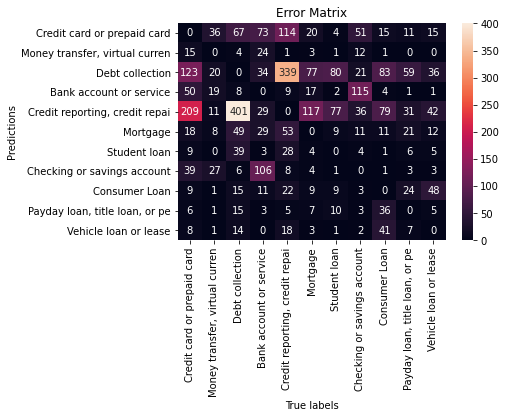

In [ ]:
conf_mat = confusion_matrix(pred_lr, Y_test)
plot_matrix(conf_mat, 'Error Matrix', remove_diagonal=True)

**Since we removed diagonal elements then perfect prediction would look like matrix with all zeros. This would mean that we did not misslassify any target value.
Systematic error: debt collection is often missclassified as credit reporting, credit repay and vise versa. We can see this because of large numbers in corresponding matrix cells.This happens because those categories are related. When someone repays credit that means that other party collects debt.**

__5. Suppose that the priority level of complaints varies by product category. You know that higher priority complaints need to be addressed faster. You also know that complaints incorrectly classified by the model will be given the correct classification (and therefore also the correct priority) by the first agent to which the complaint is assigned. If the agent has no knowledge about the product category of the complaint, he/she can forward the complaint to someone else. This is how priority level varies by product:__

__High priority__
* 'Money transfer, virtual currency, or money service'
* 'Bank account or service'
* 'Checking or savings account'

__Normal priority__
* 'Credit card or prepaid card'
* 'Mortgage'
* 'Student loan'
* 'Consumer Loan'
* 'Payday loan, title loan, or personal loan'
* 'Vehicle loan or lease'

__Low priority__
* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Debt collection'

__Below you will find three cost matrices. Compute the total cost of your model according to each of them. If you were to compare multiple models, which cost matrix do you think would be better to compare the models? Why? Would you consider making any modifications to the cost matrix that you chose? If so, explain what would you consider changing and why.__

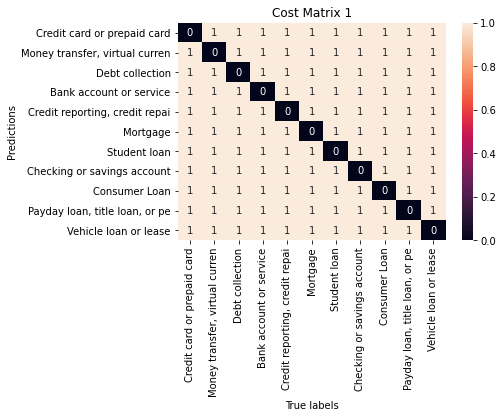

In [ ]:
cost_matrix_1 = np.array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_1, 'Cost Matrix 1')

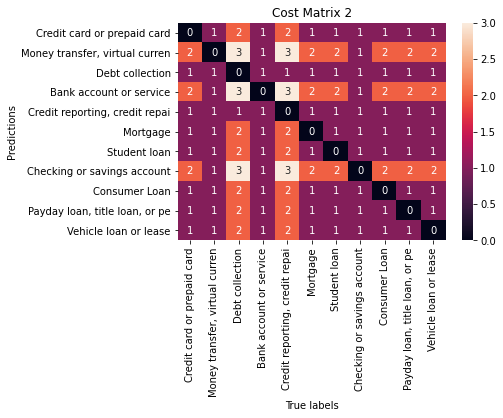

In [ ]:
cost_matrix_2 = np.array([[0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_2, 'Cost Matrix 2')

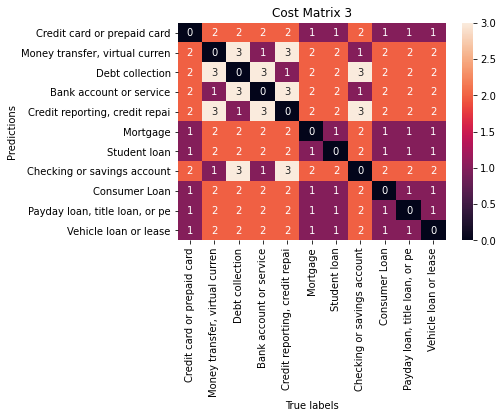

In [ ]:
cost_matrix_3 = np.array([[0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1],
                          [1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0]])
plot_matrix(cost_matrix_3, 'Cost Matrix 3')

In [ ]:
# Replace random_conf_mat with the confusion matrix you generated in the last question.

print("Cost with matrix 1: ", (random_conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (random_conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (random_conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  68738
Cost with matrix 2:  121782
Cost with matrix 3:  132752


In [ ]:
# Your answer here.
print("Cost with matrix 1: ", (conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  3452
Cost with matrix 2:  4109
Cost with matrix 3:  5664


 **Cost matrix 3 looks better than others in terms of penalizing missclassification between priority groups. For example, within high priority group the cost would be only 1. If we missclassify high priority as normal the cost would be 2. In worst case scenario the cost would be 3.
I would change cost for some classes in normal priority. For example, missclassfying  consumer loan as debt collection and  money transfer,virtual currency, money service cost the same - 2. Despite the fact that money transfer, virtual currency, money service is in high priority group, while debt collection is in low priority. I would change the cost to 3 for all cases when we missclassify categories from normal priority as  categories from high priority. If we keep this unchanged then we would waste resources of resolving normal priority categories by treating them like high priority**